## 吴恩达机器学习习题四：神经网络（多分类问题）<br><br>
- 实现手写数字识别 

![](./IMG_3347.JPG)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.optimize import minimize

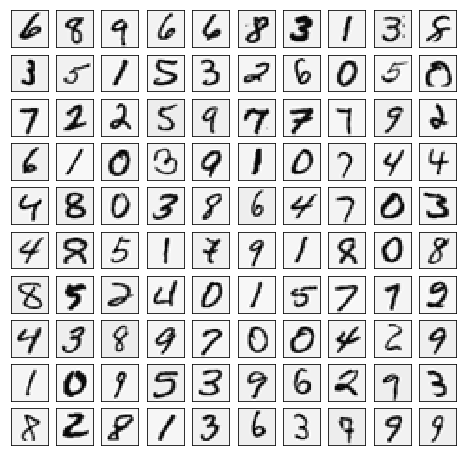

In [2]:
#读取数据
data = sio.loadmat('ex4data1.mat')
X1 = data['X']  #(5000, 400)
y1 = data['y']  #(5000, 1)
#数据可视化
def show_image(X):
    sample_index = np.random.choice(len(X),100)
    imagines = X[sample_index,:]
    fig,ax = plt.subplots(10,10,figsize=(8,8),sharex=True,sharey=True)
    for r in range(10):
        for c in range(10):
            ax[r,c].imshow(imagines[10*r+c].reshape(20,20).T,cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()
show_image(X1)

In [3]:
#对y进行独热编码处理：one-hot编码
def one_hot_encoder(y):
    
    results = []
    for i in y:  #y中的元素为1-10中任意一个数，即结果 
        y_temp = np.zeros(10)  #y_temp为一个行向量
        y_temp[i-1] = 1  #假如此数字为5，那么y_temp的第五个元素为1(矩阵第一个元素位置为0)
        results.append(y_temp)
    return np.array(results)  

In [4]:
#序列化权重参数(theta)
def serialize(a,b):
    
    return np.append(a.flatten(),b.flatten())  #返回一个行向量，a在前，b在后

In [5]:
#解序列化权重参数
def deserialize(theta_serialize):
    theta1 = theta_serialize[:25*401].reshape(25,401)
    theta2 = theta_serialize[25*401:].reshape(10,26)
    return theta1,theta2

In [6]:
def sigmoid(z):
    
    return 1/(1+np.exp(-z))

In [7]:
#正向传播
def feed_forward(theta_serialize,X):
    theta1,theta2 = deserialize(theta_serialize)
    a1 = X
    z2 = X@theta1.T  #(5000,25)
    a2_1 = sigmoid(z2)
    a2_2 = np.insert(a2_1,0,values=1,axis=1)  #(5000,26)
    z3 = a2_2@theta2.T  #(5000,10)
    a3 = sigmoid(z3)
    return a1,a2_2,z2,z3,a3

In [8]:
#代价函数
def cost_function(theta_serialize,X,y,lamda):
    
    a1,a2_2,z2,z3,a3 = feed_forward(theta_serialize,X)
    first = y*np.log(a3)
    second = (1-y)*np.log(1-a3)
    reg = lamda*(np.sum(np.power(theta1[:,1:],2))+np.sum(np.power(theta2[:,1:],2)))/(2*len(y))  #除去theta0后，每一层theta矩阵的和 
    J = reg + (-np.sum(first+second))/len(y)
    return J

In [9]:
#g(x)的导数
def sigmoid_gradient(z):
    
    return sigmoid(z)*(1-sigmoid(z))

In [10]:
#正则化梯度
def reg_gradient(theta_serialize,X,y,lamda):
    theta1,theta2 = deserialize(theta_serialize)
    a1,a2_2,z2,z3,a3 = feed_forward(theta_serialize,X)
    d3 = a3 - y  #(5000,10)
    theta1_1 = theta1[:,1:]
    theta1 = np.insert(theta1_1,0,values=0,axis=1)
    theta2_1 = theta2[:,1:]
    d2 = d3 @ theta2_1 * sigmoid_gradient(z2)  #(5000,25)
    theta2 = np.insert(theta2_1,0,values=0,axis=1)
    D2 = (d3.T @ a2_2)/len(y)  #(10,26)
    D2 = D2 + theta2*lamda/len(y)  #(10,26)
    D1 = (d2.T @ a1)/len(y)
    D1 = D1 + theta1*lamda/len(y)  #(25,401)
    return serialize(D1,D2)

In [11]:
#优化函数
def nn_training(X,y):
    
    init_theta = np.random.uniform(-0.5,0.5,10285)
    result = minimize(fun=cost_function,
                     x0=init_theta,
                     args=(X,y,lamda),
                     method='TNC',
                     jac=reg_gradient,
                     options={'maxiter':300})
    return result

In [12]:
#读取theta
theta = sio.loadmat('ex4weights.mat')
theta1 = theta['Theta1']  #(25, 401)
theta2 = theta['Theta2']  #(10, 26)

theta_serialize = serialize(theta1,theta2)  #(10285,)

y = one_hot_encoder(y1)  #(5000, 10)
X = np.insert(X1,0,values=1,axis=1)  #(5000,401)
y_result = data['y'].reshape(5000,)

#准确率
lamda = 10
result = nn_training(X,y)
a1,a2_2,z2,z3,a3 = feed_forward(result.x,X)
y_pred = np.argmax(a3,axis=1) + 1
acc = np.mean(y_pred == y_result)
print('准确率为:'+str(acc))

准确率为:0.9382


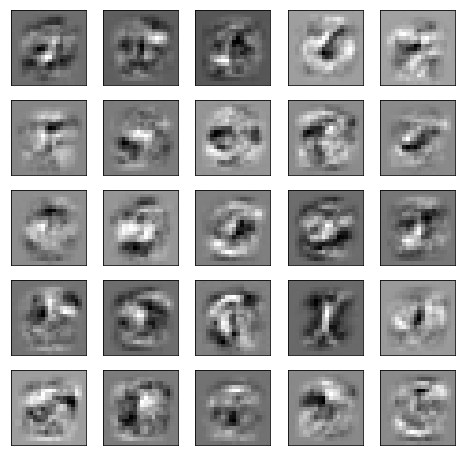

In [13]:
#可视化隐藏层
def plot_hidden_layer(theta):
    theta1,_ = deserialize(theta)
    hidden_layer = theta1[:,1:] # (25,400)
    fig,ax = plt.subplots(5,5,figsize=(8,8),sharex=True,sharey=True)
    for r in range(5):
        for c in range(5):
            ax[r,c].imshow(hidden_layer[5 * r + c].reshape(20,20).T,cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.show
plot_hidden_layer(result.x)    